In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd
import datetime as dt

tunit_JST = 'days since 1968-05-23 09:00:00 GMT'


def rmse1(obsfile, modfile, varid, drange):

    mod = netCDF4.Dataset(modfile, 'r')
    obs = netCDF4.Dataset(obsfile, 'r')
    trange = netCDF4.date2num(drange, tunit_JST)

    time = obs.variables['obs_time'][:]
    index = np.where((time > trange[0]) & (time < trange[1]))
    
    time = netCDF4.num2date(time[index], tunit_JST)
    x = mod.variables['NLmodel_value'][index]
    y = obs.variables['obs_value'][index]
    type = obs.variables['obs_type'][index]
    depth = obs.variables['obs_depth'][index]
    station = obs.variables['obs_station'][index]
    
    data = {'station': station, 'depth': depth, 'type': type, 'x': x, 'y': y}
    df = pd.DataFrame(data, index=time)
    df = df[df.x<999.9]
    df = df[df.x>1.0]
    df = df[df.type==varid]
    #df = df[df.station==1]
    df['error'] = df.y - df.x
    df['SE'] = df.error ** 2
    
    #print df.head(30)
    
    df = df.resample('H', how='mean')
    df['RMSE'] = np.sqrt(df.SE)
    df.RMSE.plot()

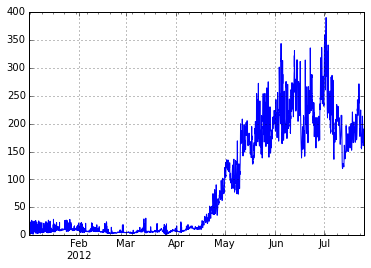

In [2]:
modfile = '/Users/teruhisa/mnt/apps/OB500_fennelP/NL04/ob500_mod.nc'
obsfile = '/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc'
varid = 10
drange = [dt.datetime(2012,1,1,0), dt.datetime(2013,1,1,0)]

rmse1(obsfile, modfile, varid, drange)

/Users/teruhisa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/teruhisa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


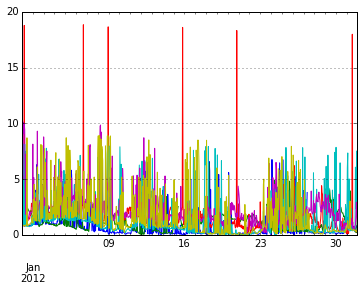

In [9]:
def rmse2(obsfile, modfile, varid, drange):

    mod = netCDF4.Dataset(modfile, 'r')
    obs = netCDF4.Dataset(obsfile, 'r')
    trange = netCDF4.date2num(drange, tunit_JST)

    time = obs.variables['obs_time'][:]
    index = np.where((time > trange[0]) & (time < trange[1]))
    
    time = netCDF4.num2date(time[index], tunit_JST)
    x = mod.variables['NLmodel_value'][index]
    y = obs.variables['obs_value'][index]
    type = obs.variables['obs_type'][index]
    depth = obs.variables['obs_depth'][index]
    station = obs.variables['obs_station'][index]
    
    data = {'station': station, 'depth': depth, 'type': type, 'x': x, 'y': y}
    df = pd.DataFrame(data, index=time)
    df = df[df.x<999.9]
    df = df[df.x>1.0]
    df = df[df.type==varid]
    
    for s in [3,4,5,6,12,13]:
        sta = df[df.station==s]
        sta['error'] = sta.y - sta.x
        sta['SE'] = sta.error ** 2

        #print df.head(30)

        sta = sta.resample('', how='mean')
        sta['RMSE'] = np.sqrt(sta.SE)
        sta.RMSE.plot()
    
obsfile = '/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc'
modfile = '/Users/teruhisa/mnt/apps/OB500_fennelP/NL03/ob500_mod.nc'
varid = 7
drange = [dt.datetime(2012,1,1,0), dt.datetime(2012,2,1,0)]

rmse2(obsfile, modfile, varid, drange)

In [ ]:
rmse2(obsfile, modfile, 10, drange)